In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Данные:
Будем работать с датасетом [Boston Housing Prices](https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef).

In [7]:
from sklearn.datasets import load_boston #импортируем датасет
HPB = load_boston()                      # HPB - Housing Prices in Boston
#print(HPB.DESCR)                        #Описание нашего датасета
HPB.data.shape

(506L, 13L)

In [3]:
#df_date = pd.DataFrame(HPB.data)         #переводим данные в табличку # df - date frame

In [4]:
#df_date.columns = HPB.feature_names      # добавляем название каждой колонке

In [5]:
#df_date

In [6]:
#df_date.head()

In [7]:
#df_date['Housing_Price'] = HPB.target       #добавляем справа новую колонку - цена дома

In [8]:
#df_date.head()

In [84]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(HPB.data, HPB.target, test_size = 0.25)  #разделяем выборку на тренировочные и тестовые данные 

Text(0.5,0,'Price')

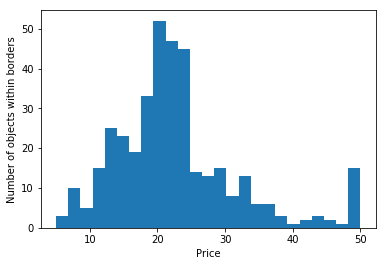

In [67]:
plt.hist(y_train, bins=25)
plt.ylabel('Number of objects within borders')
plt.xlabel('Price')

### Задание.
Будем решать задачу регрессии. Целевая переменная -- цена дома, признаки - различная информация о домохозяйстве. Для решения будем использовать линейную регрессию. Ваша задача - оценить качество решения в зависимости от количества объектов в обучающей выборке. Качество решения будем оценивать с помощью среднеквадратичной и среднеабсолютной ошибки, а так же [коэффициента детерминации $r^2$](http://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination). Также требуется оценить дисперсию данных функционалов в зависимости от числа объектов в обучающей выборке. 

*Обращаем ваше внимание, что для качественной оценки данных зависимостей эксперименты для каждого размера выборки стоит повторять многократно на различных случайных подвыборках.*

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

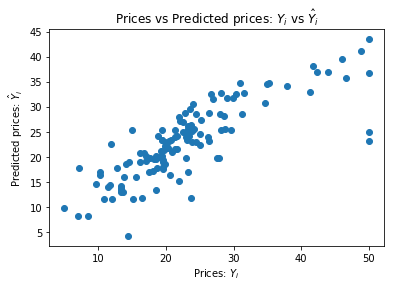

In [88]:
LR = LinearRegression()
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [69]:
print('mae = {}'.format(mean_absolute_error(y_test, y_pred)))
print('mse = {}'.format(mean_squared_error(y_test, y_pred)))
print('prediction variance = {}'.format(np.std((y_test - y_pred)**2)))

mae = 3.05757483192
mse = 19.9438302134
prediction variance = 62.2465398772


In [183]:
n_samples_grid = np.arange(1, 480, 2) 
#n_samples_grid

In [152]:
def explore_errors(size):
    MSE_SUM = MAE_SUM = R_2_SUM = 0
    MSE_SUM_SQ = MAE_SUM_SQ = R_2_SUM_SQ = 0
    repeat_number = 100
    
    for i in range(repeat_number):
        X_train, X_test, y_train, y_test = train_test_split(HPB.data, HPB.target, test_size = size)
        LR.fit(X_train, y_train)
        y_pred = LR.predict(X_test)
        MSE = mean_squared_error(y_test, y_pred)
        MSE_SUM += MSE
        MSE_SUM_SQ += MSE ** 2
        MAE = mean_absolute_error(y_test, y_pred)
        MAE_SUM += MAE
        MAE_SUM_SQ += MAE ** 2
        R_2 = r2_score(y_test, y_pred)
        R_2_SUM += R_2
        R_2_SUM_SQ += R_2 ** 2
        
    MSE_MEAN = MSE_SUM / repeat_number    
    MAE_MEAN = MAE_SUM / repeat_number
    R_2_MEAN = R_2_SUM / repeat_number
    
    MSE_VAR = MSE_SUM_SQ / repeat_number - MSE_MEAN
    MAE_VAR = MAE_SUM_SQ / repeat_number - MAE_MEAN
    R_2_VAR = R_2_SUM_SQ / repeat_number - R_2_MEAN
    return (MSE_MEAN, MAE_MEAN, R_2_MEAN, MSE_VAR, MAE_VAR, R_2_VAR)

In [184]:
MSE, MAE, R_2, MSE_VAR, MAE_VAR, R_2_VAR = [], [], [], [], [], []
for i in n_samples_grid:
    errors = explore_errors(i)
    MSE.append(errors[0])
    MAE.append(errors[1])
    R_2.append(errors[2])
    MSE_VAR.append(errors[3])
    MAE_VAR.append(errors[4])
    R_2_VAR.append(errors[5])

# MSE
### mean squared error

Text(0,0.5,'MSE')

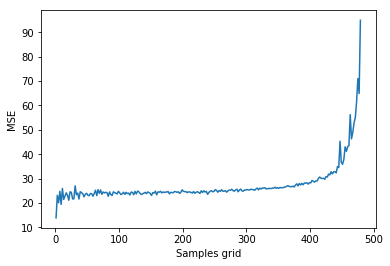

In [185]:
plt.plot(n_samples_grid, MSE)
plt.xlabel("Samples grid")
plt.ylabel("MSE")

# MAE
### mean absolute error

Text(0,0.5,'MAE')

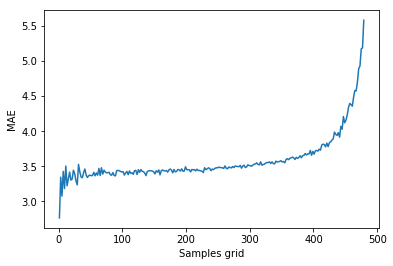

In [186]:
plt.plot(n_samples_grid, MAE)
plt.xlabel("Samples grid")
plt.ylabel("MAE")

# R_2
### coefficient of determination

Text(0,0.5,'$r^2$')

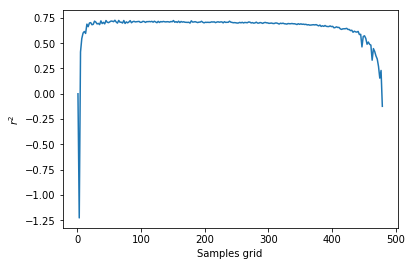

In [187]:
plt.plot(n_samples_grid, R_2)
plt.xlabel("Samples grid")
plt.ylabel("$r^2$")

# Variance of MSE

Text(0,0.5,'$\\sigma(MSE)$')

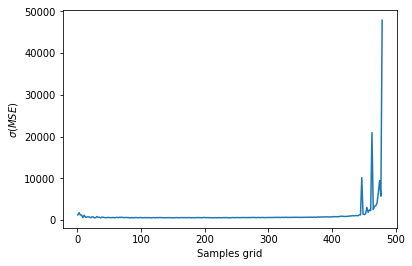

In [188]:
plt.plot(n_samples_grid, MSE_VAR)
plt.xlabel("Samples grid")
plt.ylabel("$\sigma(MSE)$")

# Variance of MAE

Text(0,0.5,'$\\sigma(MAE)$')

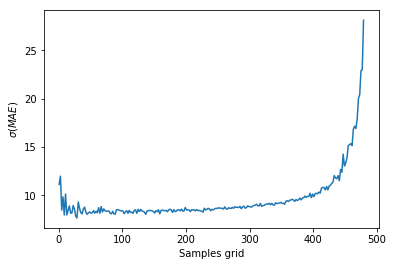

In [189]:
plt.plot(n_samples_grid, MAE_VAR)
plt.xlabel("Samples grid")
plt.ylabel("$\sigma(MAE)$")

# Variance of R_2

Text(0,0.5,' $\\sigma(r^2)$')

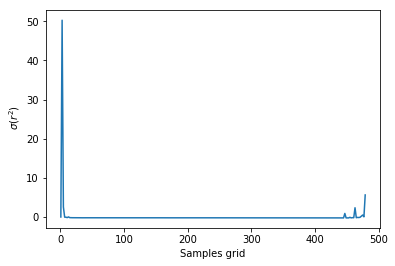

In [190]:
plt.plot(n_samples_grid, R_2_VAR)
plt.xlabel("Samples grid")
plt.ylabel(" $\sigma(r^2)$")

# Conclusion
Из графиков выше видно, что, увеличивая число тестовых данных от очень малого числа до почти всего, наблюдаются резкие скочки функций(функционалов), т.е. ошибки резко возрастают. Это говорит о том, что при малой части тестовых данных от числа всех данных, а так с увеличением тестовой выборки вплодь буквально до всех данных (тренировочные стремятся к нулю) ухудшается качество решения нашего алгоритма линейной регрессии.

In [ ]:
# # Plot code example from ODS Open Machine Course notebook from lesson 9
# # Source: https://github.com/Yorko/mlcourse_open/blob/master/jupyter_russian/topic09_time_series/topic9_part1_time_series_python.ipynb
#     plt.figure(figsize=(15, 5))
#     plt.plot(prediction_test, label="prediction")
#     plt.plot(lower, "r--", label="upper bond / lower bond")
#     plt.plot(upper, "r--")
#     plt.plot(list(y_test), label="y_test")
#     plt.plot(Anomalies, "ro", markersize=10)
#     plt.legend(loc="best")
#     plt.axis('tight')
#     plt.title("XGBoost Mean absolute error {} users".format(round(mean_absolute_error(prediction_test, y_test))))
#     plt.grid(True)
#     plt.legend()